In [54]:
# Import Data Manipulation Libraries
import numpy as np
import pandas as pd
# Import Data Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns
# Import Filter Warning Library
import warnings
warnings.filterwarnings('ignore')
# Import Scikit Learn Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
# Customize Descriptive stats
from collections import OrderedDict

In [4]:
# Import Dataset using pandas function
df = pd.read_csv('/content/concrete_data.csv')
df.sample(5)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
785,331.0,0.0,0.0,192.0,0.0,978.0,825.0,7,16.26
930,159.0,209.0,161.0,201.0,7.0,848.0,669.0,28,30.88
916,289.0,134.0,0.0,195.0,6.0,924.0,760.0,28,46.24
150,318.8,212.5,0.0,155.7,14.3,852.1,880.4,56,66.10
163,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,91,66.60


In [5]:
# Understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
# Descriptive Stats
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [62]:
# Univariate Analysis
stats = []

for i in df.columns:
  numerical_stats = OrderedDict({
      'Feature': i,
      'Max': df[i].max(),
      'Min': df[i].min(),
      'Mean': df[i].mean(),
      'Median':df[i].median(),
      'Standard Deviation':df[i].std(),
      'Variance': df[i].var(),
      'Skewness': df[i].skew(),
      'Kurtosis': df[i].kurt(),
      '25%': df[i].quantile(0.25),
      '75%': df[i].quantile(0.75),
      'IQR': df[i].quantile(0.75) - df[i].quantile(0.25)
  })

  stats.append(numerical_stats)

report = pd.DataFrame(stats)
report.T

,0,1,2,3,4,5,6,7,8
Feature,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
Max,540.0,359.4,200.1,247.0,32.2,1145.0,992.6,365.0,82.6
Min,102.0,0.0,0.0,121.8,0.0,801.0,594.0,1.0,2.33
Mean,281.167864,73.895825,54.18835,181.567282,6.20466,972.918932,773.580485,45.662136,35.817961
Median,272.9,22.0,0.0,185.0,6.4,968.0,779.5,28.0,34.445
Standard Deviation,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.17598,63.169912,16.705742
Variance,10921.58022,7444.124812,4095.616541,456.002651,35.686781,6045.677357,6428.187792,3990.437729,279.081814
Skewness,0.509481,0.800717,0.537354,0.074628,0.907203,-0.04022,-0.25301,3.269177,0.416977
Kurtosis,-0.520652,-0.508175,-1.328746,0.122082,1.411269,-0.599016,-0.102177,12.168989,-0.313725
25%,192.375,0.0,0.0,164.9,0.0,932.0,730.95,7.0,23.71


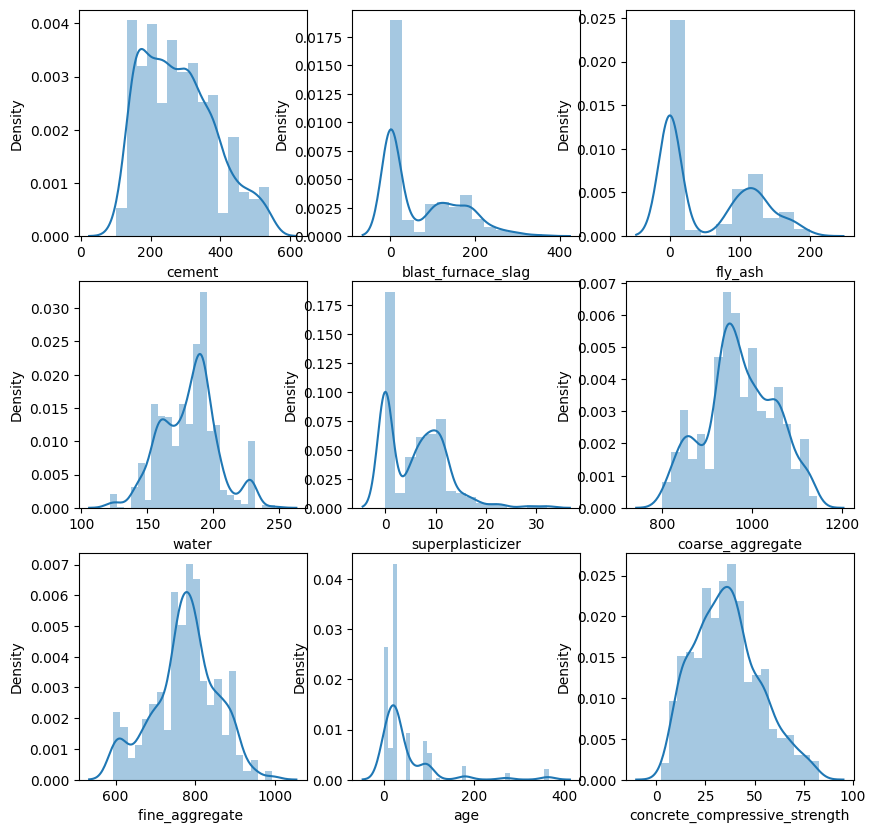

In [27]:
plt.figure(figsize = (10,10))
plot = 0
for i in df.columns:
  plot = plot + 1
  plt.subplot(3,3,plot)
  sns.distplot(df[i])
plt.show()

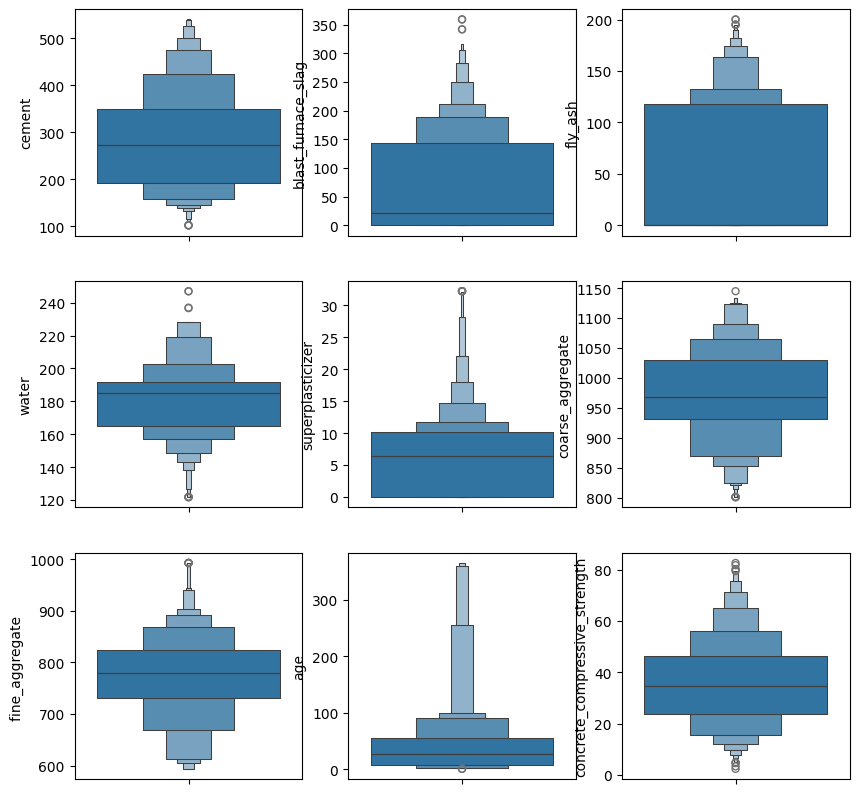

In [30]:
plt.figure(figsize = (10,10))
plot = 0
for i in df.columns:
  plot = plot + 1
  plt.subplot(3,3,plot)
  sns.boxenplot(df[i])
plt.show()

## Your Data Insights

In [31]:
# Checking Column Names
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [38]:
# Split the Data into Train and Test

X = df.drop(columns = ['concrete_compressive_strength'],axis =1)
y = df['concrete_compressive_strength']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 21)

In [53]:
# Scaling Technique
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [63]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

model.score(X_train,y_train)  # Train dataset  - 0.98
model.score(X_test,y_test)    # Test dataset  - 0.90

# Training accuracy = Test Accuracy

0.9027448720891091

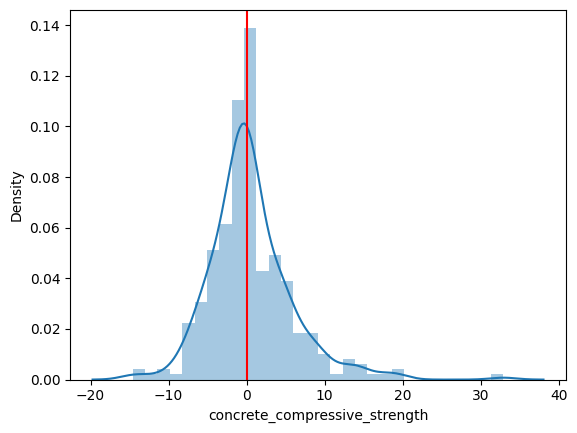

In [65]:
sns.distplot(y_test - y_pred)
plt.axvline(0,color = 'red')
plt.show()

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

model.score(X_train,y_train)  # Train dataset  - 0.599
model.score(X_test,y_test)    # Test dataset  - 0.66

0.6610135755875733